<a href="https://colab.research.google.com/github/gauravry/DS_Portfolio/blob/main/Advance_Pricing_using%20Monte%20Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

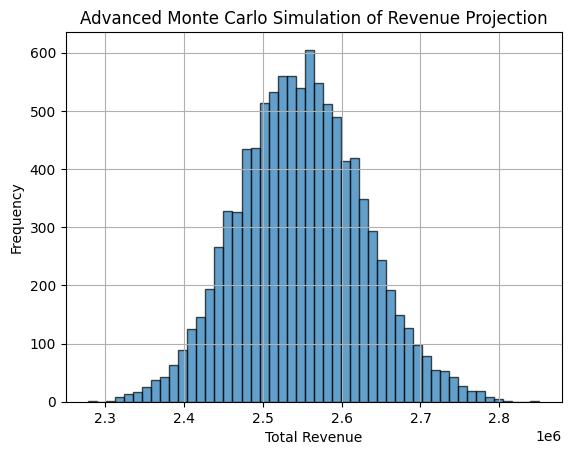

Mean Total Revenue: $2548769.69
Median Total Revenue: $2547738.92
Standard Deviation of Total Revenue: $78845.85
5th Percentile of Total Revenue: $2421971.29
95th Percentile of Total Revenue: $2681311.90


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of iterations for the simulation
num_iterations = 10000
months = 12

# Seasonality parameters
seasonality_amplitude = 0.2
seasonality_period = 12

# Marketing effectiveness coefficient
marketing_effectiveness = 0.0001

# Product parameters (mean and stddev for units sold and price)
products = [
    {"units_mean": 1000, "units_stddev": 100, "price_mean": 50, "price_stddev": 5},
    {"units_mean": 1500, "units_stddev": 150, "price_mean": 40, "price_stddev": 4},
    {"units_mean": 2000, "units_stddev": 200, "price_mean": 30, "price_stddev": 3},
]

# Generate monthly seasonality effects
months_array = np.arange(months)
seasonality_effects = 1 + seasonality_amplitude * np.sin(2 * np.pi * months_array / seasonality_period)

# Initialize results
total_revenue_samples = np.zeros(num_iterations)

# Monte Carlo simulation
for i in range(num_iterations):
    total_revenue = 0

    for product in products:
        # Generate base units sold and price per unit samples
        units_sold_base = np.random.normal(product["units_mean"], product["units_stddev"], months)
        price_base = np.random.normal(product["price_mean"], product["price_stddev"], months)

        # Generate random marketing spend for each month
        marketing_spend = np.random.uniform(0, 5000, months)
        marketing_effects = 1 + marketing_effectiveness * marketing_spend

        # Calculate monthly units sold with seasonality and marketing effects
        units_sold = units_sold_base * seasonality_effects * marketing_effects

        # Calculate monthly revenue
        revenue = units_sold * price_base

        # Accumulate total revenue for this iteration
        total_revenue += np.sum(revenue)

    # Store the total revenue sample
    total_revenue_samples[i] = total_revenue

# Plotting the results
plt.hist(total_revenue_samples, bins=50, edgecolor='k', alpha=0.7)
plt.title('Advanced Monte Carlo Simulation of Revenue Projection')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics
mean_revenue = np.mean(total_revenue_samples)
median_revenue = np.median(total_revenue_samples)
stddev_revenue = np.std(total_revenue_samples)
percentile_5th = np.percentile(total_revenue_samples, 5)
percentile_95th = np.percentile(total_revenue_samples, 95)

print(f"Mean Total Revenue: ${mean_revenue:.2f}")
print(f"Median Total Revenue: ${median_revenue:.2f}")
print(f"Standard Deviation of Total Revenue: ${stddev_revenue:.2f}")
print(f"5th Percentile of Total Revenue: ${percentile_5th:.2f}")
print(f"95th Percentile of Total Revenue: ${percentile_95th:.2f}")
